# **Some Important Insights :**

1.Person having high chest pain are more probable to suffer from Heart Attack.

2.Person having higher heart rate are more probable to suffer from Heart Attack.

3.Males are more probable to suffer from heart attack as compare to Females.

4.Person doesnot have exercied indeced enginal are higly probable to suffer from heart attack.

# **Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

# **Reading Data**

In [3]:
data=pd.read_csv("/content/heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# Assuming 'output' is the column name in your dataset
data['output'] = data['output'].replace({1: 'heart_disease', 0: 'no_heart_disease'})


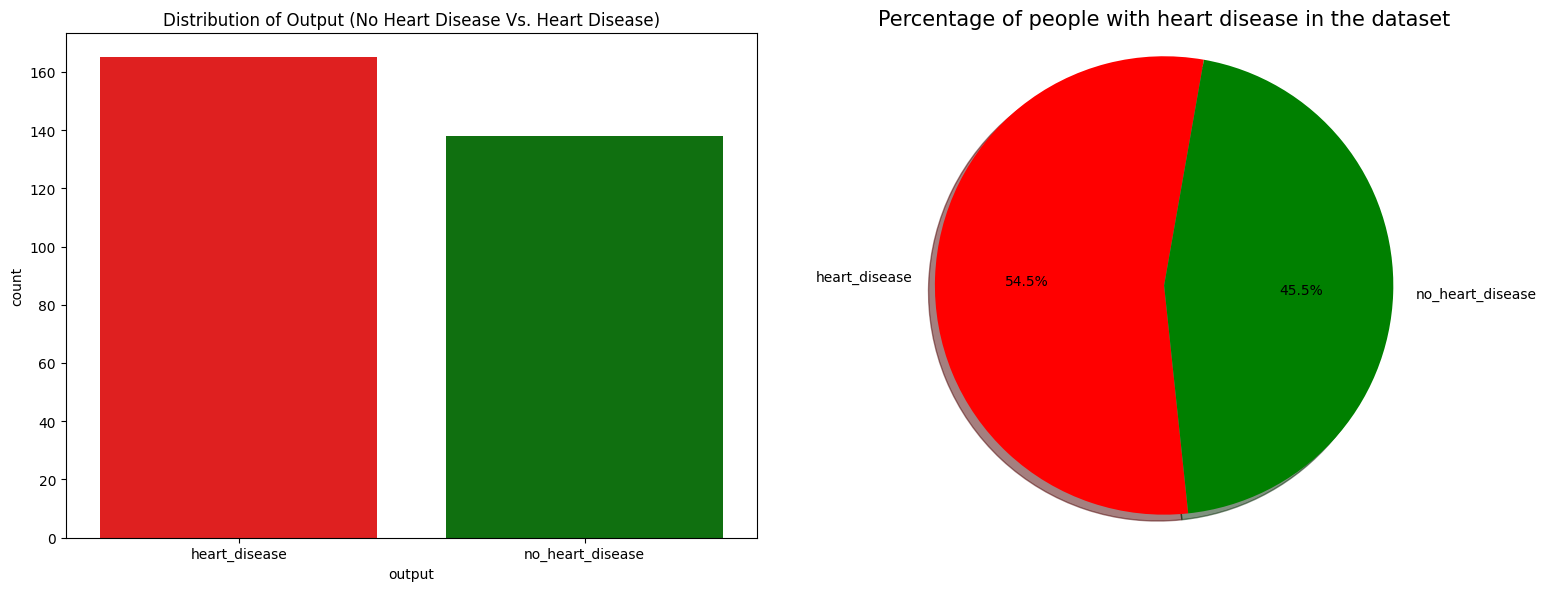

In [12]:

# Set up the subplots
plt.figure(figsize=(16, 6))

# Subplot 1: Count plot for the target variable 'output'
plt.subplot(1, 2, 1)
sns.countplot(x='output', data=data, palette={'no_heart_disease': 'green', 'heart_disease': 'red'})
plt.title('Distribution of Output (No Heart Disease Vs. Heart Disease)')

# Subplot 2: Pie chart for the percentage of people with heart disease
plt.subplot(1, 2, 2)
heart = Counter(data['output'])
classes = []
count = []

for i in heart.keys():
    classes.append(i)
    count.append(heart[i])

plt.pie(
    count,
    labels=classes,
    shadow=True,
    colors=['red', 'green'],
    startangle=80,
    autopct='%1.1f%%'
)
plt.axis('equal')
plt.tight_layout()
plt.title("Percentage of people with heart disease in the dataset", fontsize=15)

# Show the combined plot
plt.show()


As 54% of the person have heart attack so data is almost balanced so no need to balance the data.

# **Distribution of Features**

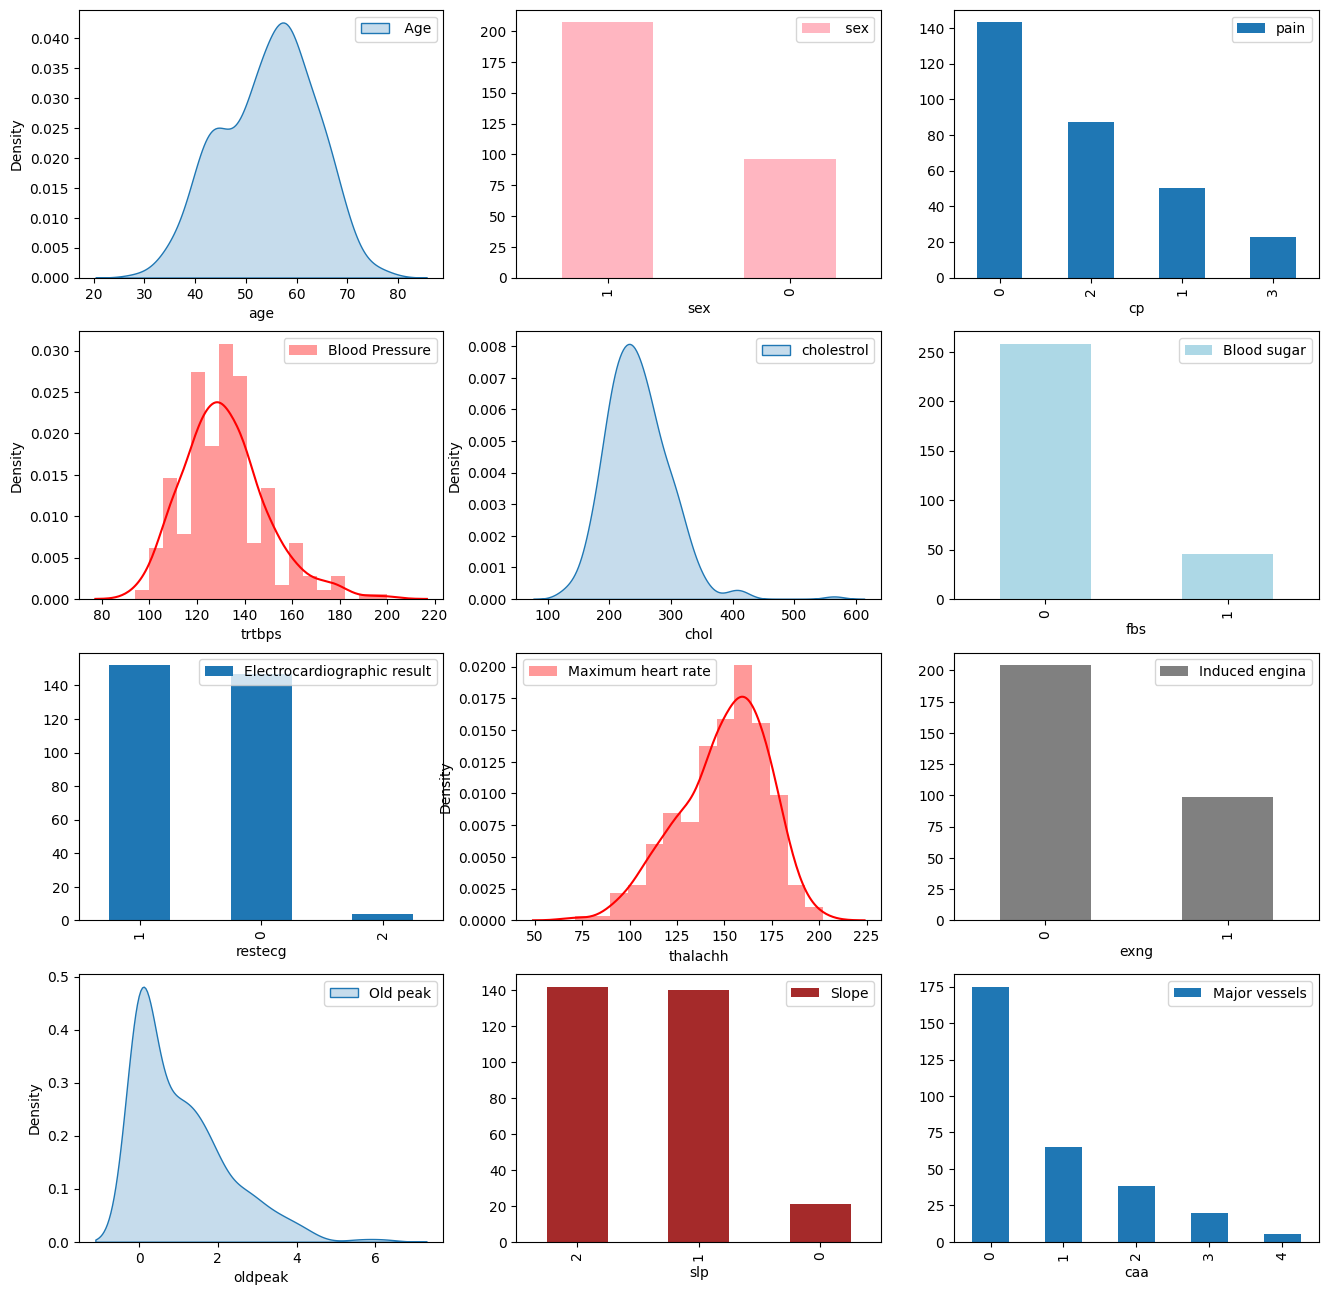

In [7]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(data['age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
data['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
data['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(data['trtbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(data['chol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
data['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
data['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(data['thalachh'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
data['exng'].value_counts().plot(kind='bar',label='Induced engina', color="grey")
plt.xlabel('exng')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(data['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
data['slp'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slp')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
data['caa'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('caa')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()


**Age Distribution:**
*   Predominant age range: 50-60 years

**Chest Pain:**
*   Noteworthy prevalence of less chest pain

**Blood Pressure:**
*   Common blood pressure range: 120-140

**Cholesterol Levels:**

*   Prevalent cholesterol levels: 200-300

**Blood Sugar:**

*   Majority exhibit blood sugar levels below 120

**Gender Distribution:**

*   Predominance of males in the dataset

**Heart Rate:**

*   Typical heart rate range: 150-175 beats per minute


 These aggregate findings provide a snapshot of the prevalent health parameters within the analyzed population, facilitating a comprehensive understanding of key health indicators.

# **Distribution of Features w.r.t Heart Attack**

In [14]:
import plotly.figure_factory as ff
import pandas as pd

# Extracting age data for individuals with heart disease (output == 1)
heart = data[data['output'] == 'heart_disease']['age'].fillna(0.0).astype(float)

# Extracting age data for individuals without heart disease (output == 0)
heart_no = data[data['output'] == 'no_heart_disease']['age'].fillna(0.0).astype(float)

# Creating a distribution plot for the age distribution in individuals with and without heart disease
fig_age = ff.create_distplot([heart, heart_no], ['Heart Disease', 'No Heart Disease'], bin_size=0.65, curve_type='normal',
                             colors=['red', 'green'])

# Updating layout for the age distribution plot
fig_age.update_layout(
    title="Heart Attack Distribution over Age",
    xaxis_title="Age",
)

# Displaying the age distribution plot
fig_age.show()

# Extracting heart rate data for individuals with heart disease (output == 1)
heart = data[data['output'] == 'heart_disease']['thalachh'].fillna(0.0).astype(float)

# Extracting heart rate data for individuals without heart disease (output == 0)
heart_no = data[data['output'] == 'no_heart_disease']['thalachh'].fillna(0.0).astype(float)

# Creating a distribution plot for the heart rate distribution in individuals with and without heart disease
fig_heart_rate = ff.create_distplot([heart, heart_no], ['Heart Disease', 'No Heart Disease'], bin_size=0.65,
                                    curve_type='normal', colors=['#E50914', 'green'])

# Updating layout for the heart rate distribution plot
fig_heart_rate.update_layout(
    title="Heart Attack Distribution over Heart Rate",
    xaxis_title="Heart Rate",
)

# Displaying the heart rate distribution plot
fig_heart_rate.show()


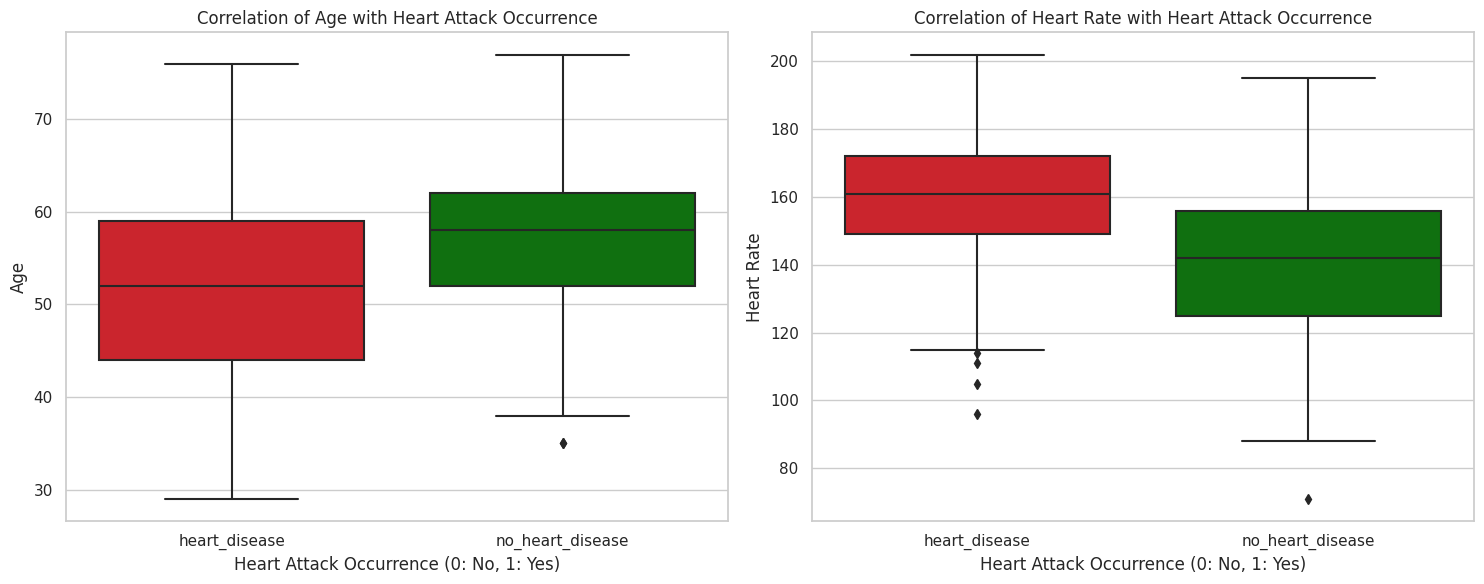

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for Age
sns.boxplot(x="output", y="age", data=data, palette=["#E50914", "green"], ax=axes[0])
axes[0].set_xlabel("Heart Attack Occurrence (0: No, 1: Yes)")
axes[0].set_ylabel("Age")
axes[0].set_title("Correlation of Age with Heart Attack Occurrence")

# Plot for Heart Rate
sns.boxplot(x="output", y="thalachh", data=data, palette=["#E50914", "green"], ax=axes[1])
axes[1].set_xlabel("Heart Attack Occurrence (0: No, 1: Yes)")
axes[1].set_ylabel("Heart Rate")
axes[1].set_title("Correlation of Heart Rate with Heart Attack Occurrence")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



The analysis underscores key insights regarding age and heart rate in relation to heart disease. Individuals aged 40-60 exhibit a higher likelihood of heart disease, aligning with established medical knowledge on age as a risk factor. Simultaneously, higher heart rates significantly correlate with an increased probability of a heart attack, emphasizing the role of heart rate as a crucial cardiovascular indicator. Overall, the combined consideration of age and heart rate identifies individuals aged 40-60 with elevated heart rates as a potential high-risk group for heart disease. This concise analysis provides valuable information for targeted preventive strategies and highlights the importance of age and heart rate in assessing cardiovascular risk.

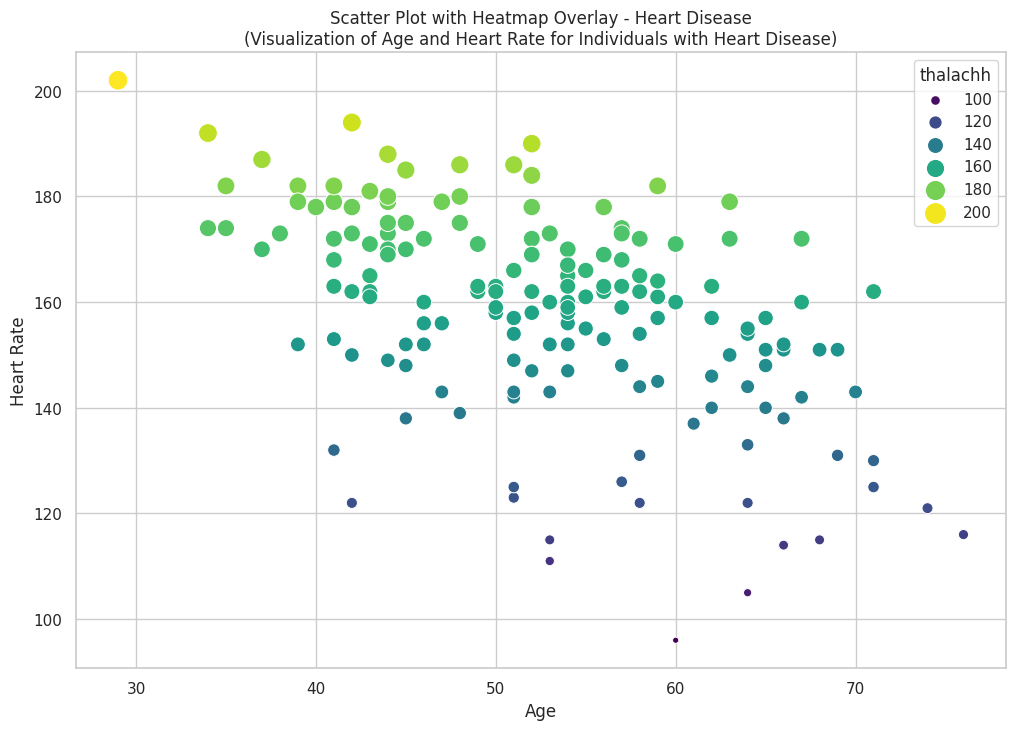

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select data for individuals with heart disease
heart_disease_data = data[data['output'] == 1]

# Create a scatter plot with a heatmap overlay
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalachh', data=heart_disease_data, hue='thalachh', palette='viridis', size='thalachh', sizes=(20, 200))

# Add labels and an enhanced title
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.title('Scatter Plot with Heatmap Overlay - Heart Disease\n(Visualization of Age and Heart Rate for Individuals with Heart Disease)')

# Show the plot
plt.show()


The scatter plot with a heatmap overlay illustrates the relationship between age and heart rate for individuals with heart disease. The color intensity and size of the points represent the heart rate, providing a visual concentration of cases. From the visualization, it becomes evident that individuals in the age range of 40-60 with higher heart rates are prominently represented in the dataset, aligning with the earlier analysis. This concentration suggests a potential high-risk group for heart disease, emphasizing the importance of age and heart rate as significant factors in predicting heart attacks.

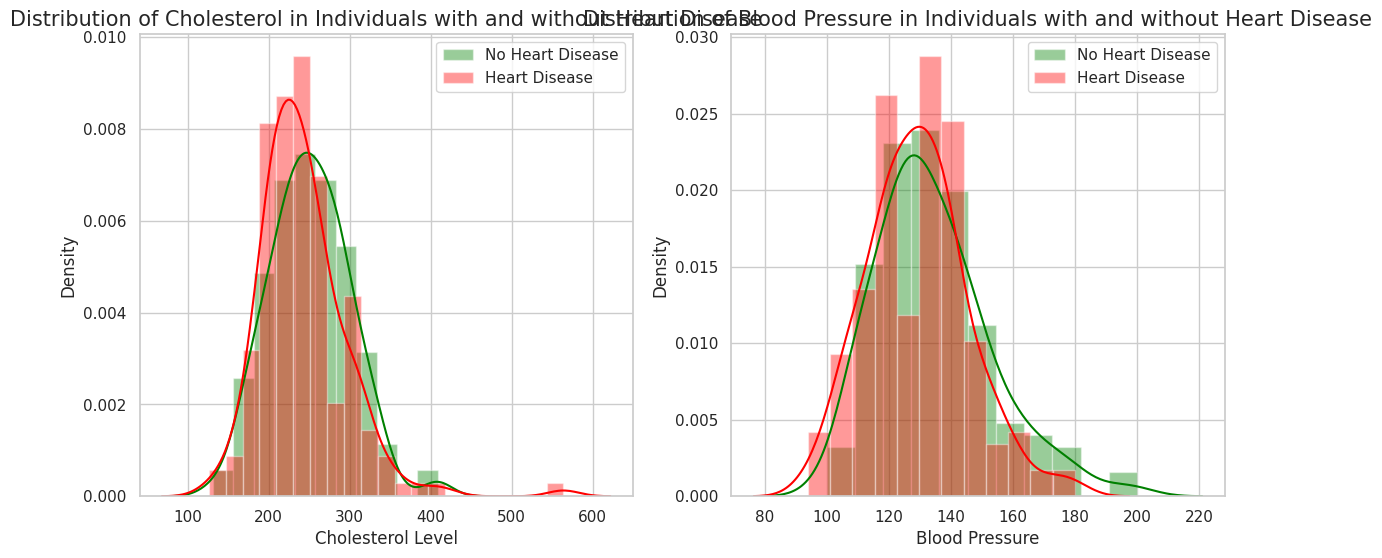

In [30]:
fig = plt.figure(figsize=(14, 6))

# Plot for Cholesterol
fig = plt.subplot(121)
sns.distplot(data[data['output'] == 0]["chol"], color='green', label='No Heart Disease')
sns.distplot(data[data['output'] == 1]["chol"], color='red', label='Heart Disease')
plt.title('Distribution of Cholesterol in Individuals with and without Heart Disease', fontsize=15)
plt.xlabel('Cholesterol Level')
plt.ylabel('Density')
plt.legend()

# Plot for Blood Pressure
fig = plt.subplot(122)
sns.distplot(data[data['output'] == 0]["trtbps"], color='green', label='No Heart Disease')
sns.distplot(data[data['output'] == 1]["trtbps"], color='red', label='Heart Disease')
plt.title('Distribution of Blood Pressure in Individuals with and without Heart Disease', fontsize=15)
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.legend()

plt.show()


* People having cholestrol 120-250 and blood pressure between 110 to 140 are more likely to have heart attack.

The analysis of the distribution plots for cholesterol and blood pressure levels reveals a notable trend concerning the likelihood of heart attacks. Individuals within the dataset who exhibit cholesterol levels in the range of 120-250 and blood pressure readings between 110 and 140 are observed to have a higher probability of experiencing a heart attack. This observation aligns with established medical knowledge, as elevated cholesterol and blood pressure are recognized risk factors for cardiovascular diseases, including heart attacks.

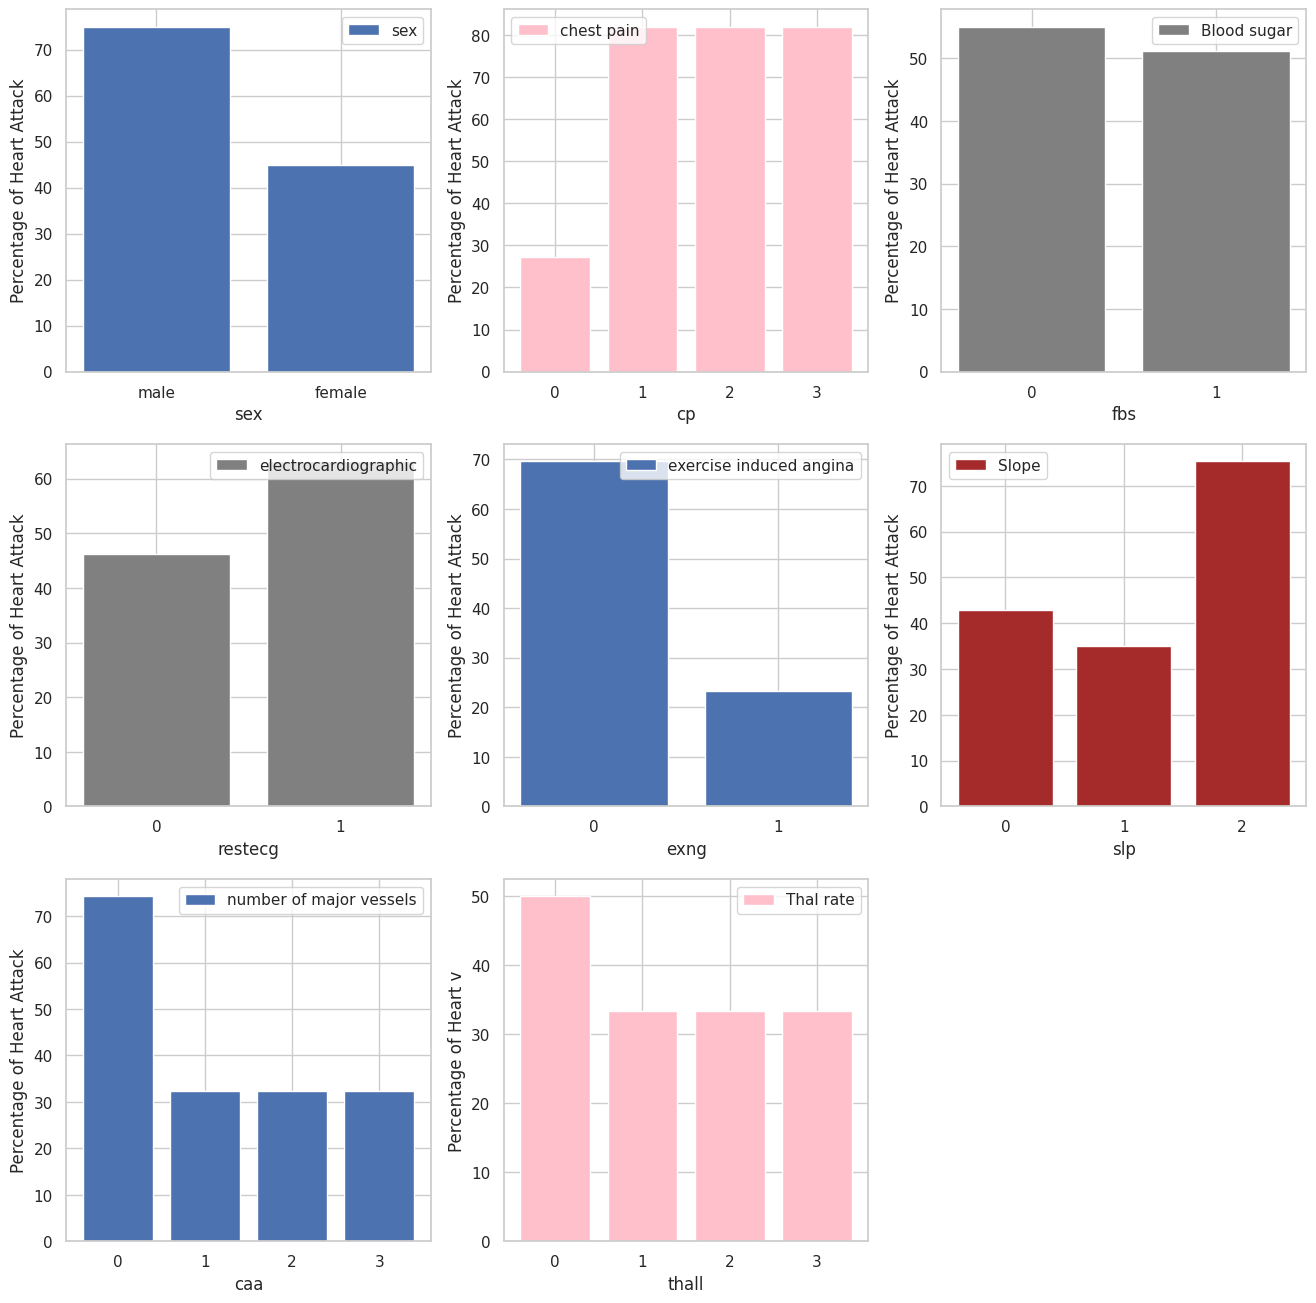

In [32]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=data
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(332)
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain' , color="pink")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(334)
name='restecg'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic' , color="grey")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(335)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(336)
name='slp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
     (100)*df[df[name]==2]['output'].sum()/len(df[df[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(337)
df=data
name='caa'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(338)
df=data
name='thall'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate', color="pink" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart v')
plt.legend()

Gender and Heart Attack:

* 53% of males in the dataset experience heart attacks, while only 45% of females are affected, indicating a higher likelihood of heart attacks in males.

Chest Pain and Heart Attack:

* Individuals experiencing chest pain are highly likely to suffer from a heart attack, highlighting chest pain as a significant indicator or symptom associated with cardiovascular issues.

Blood Sugar and Heart Attack:

* There is minimal impact of blood sugar levels on heart attacks within the dataset, suggesting that the occurrence of a heart attack is largely independent of whether an individual has elevated blood sugar.

Exercise-Induced Angina and Heart Attack:

* Individuals not having exercise-induced angina are highly probable to suffer from a heart attack. This underscores the potential relevance of exercise-induced angina as a factor influencing the likelihood of experiencing a heart attack.

# **Distribution of attribute w.r.t other attribute having hue=Heart Attack**

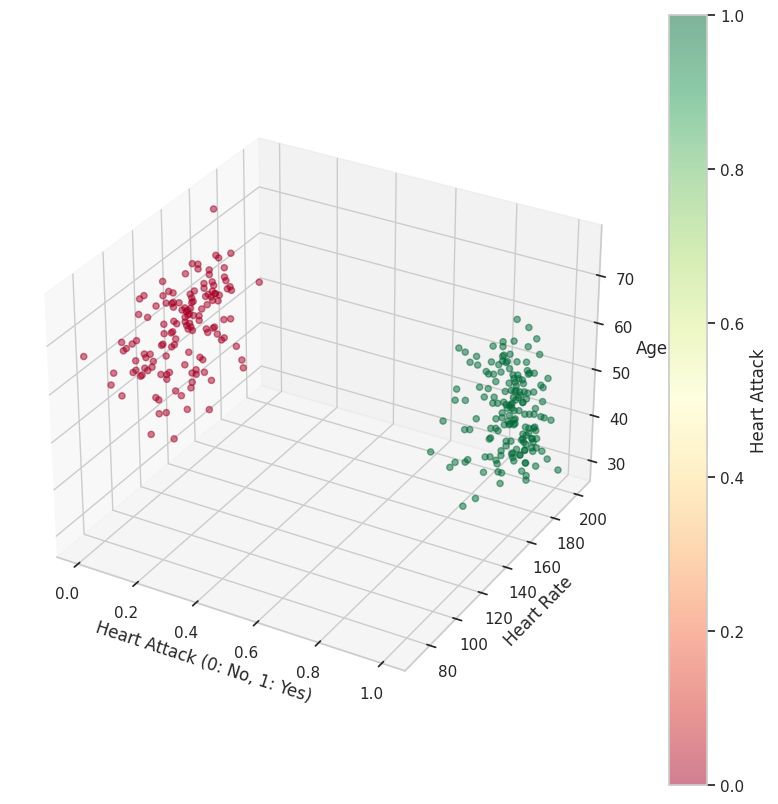

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Convert 'output' column to numeric values
data['output'] = data['output'].replace({'heart_disease': 1, 'no_heart_disease': 0})

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(data["output"], data["thalachh"], data["age"], c=data["output"], cmap="RdYlGn", s=20, alpha=0.5)

# Set labels
ax.set_xlabel('Heart Attack (0: No, 1: Yes)')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Age')

# Create a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Heart Attack')

# Show the plot
plt.show()


Individuals with a higher heart rate are highly likely to suffer from a heart attack, even though age does not contribute significantly.

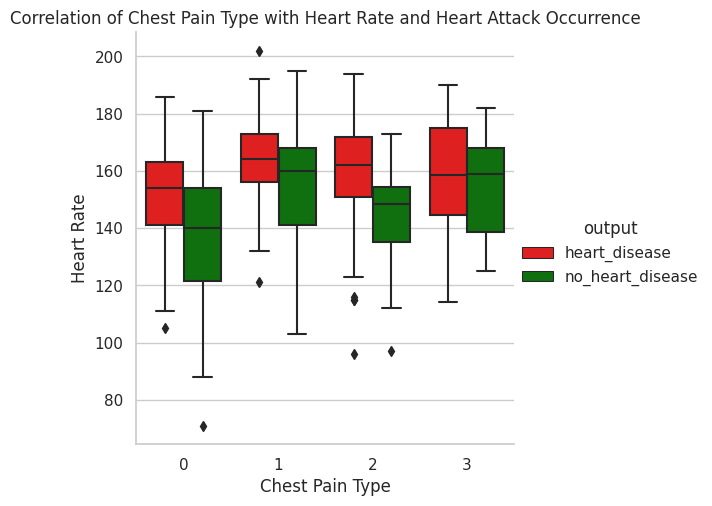

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot using catplot
sns.catplot(x="cp", y="thalachh", hue='output', kind="box", palette={"no_heart_disease": "green", "heart_disease": "red"}, data=data)

# Set labels and title
plt.xlabel("Chest Pain Type")
plt.ylabel("Heart Rate")
plt.title("Correlation of Chest Pain Type with Heart Rate and Heart Attack Occurrence")

# Show the plot
plt.show()


Individuals with elevated chest pain and a higher heart rate are more likely to experience a heart attack.

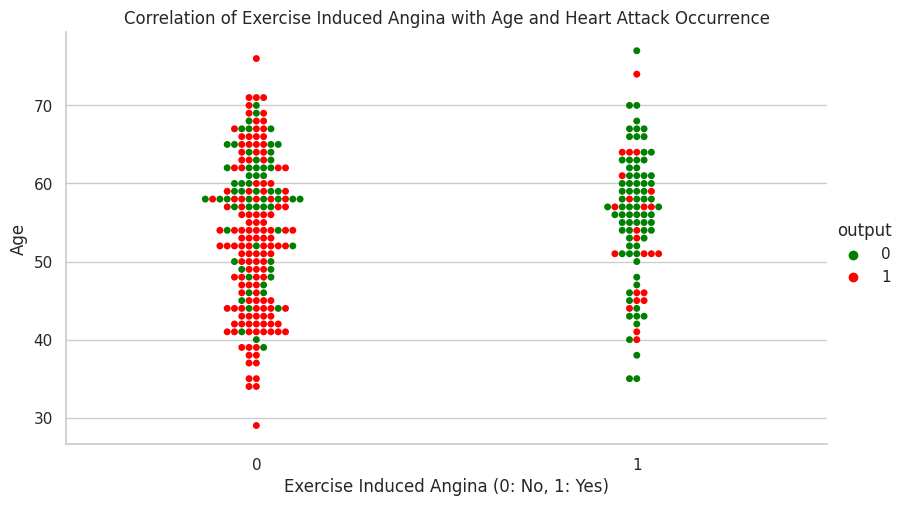

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a swarm plot using catplot
sns.catplot(data=data, x="exng", y="age", hue='output', aspect=1.7, kind="swarm", palette={0: "green", 1: "red"})

# Set labels and title
plt.xlabel("Exercise Induced Angina (0: No, 1: Yes)")
plt.ylabel("Age")
plt.title("Correlation of Exercise Induced Angina with Age and Heart Attack Occurrence")

# Show the plot
plt.show()

Individuals with low exercise-induced angina are more likely to suffer from heart disease, while age does not contribute significantly to the risk of a heart attack.

Exercise-induced angina refers to chest pain or discomfort that occurs during physical activity or exertion. It is a symptom often associated with coronary artery disease (CAD), where the blood vessels supplying the heart muscle become narrowed or blocked, reducing blood flow. During exercise, the heart requires more oxygen, and when the blood flow is restricted, it can lead to chest pain. The presence of exercise-induced angina may indicate an increased risk of heart disease, as it suggests that the heart is not receiving adequate blood supply during periods of increased demand, such as during physical activity. Individuals with low exercise-induced angina may experience less chest pain during exercise, but this could also imply reduced blood flow to the heart, potentially contributing to a higher risk of heart disease.

# **Correlation among attributes**

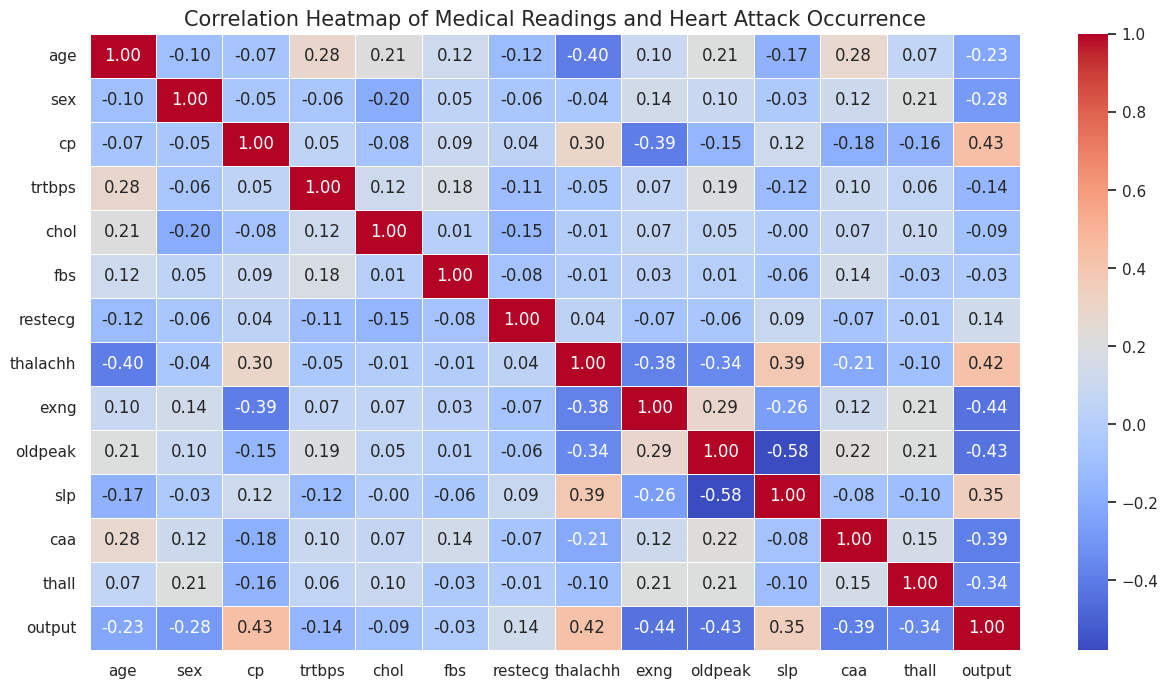

In [33]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Medical Readings and Heart Attack Occurrence', fontsize=15)
plt.show()


In [34]:
data.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


As evident from the graph and table above, there is a positive correlation between heart attack occurrence and chest pain, heart rate, and slope. Conversely, there is a negative correlation with age, exercise-induced angina, and the number of major vessels.